# Learn Seaborn: Distributions

## Introduction

In this lesson, we will explore how to use Seaborn to graph multiple statistical distributions, including box plots and violin plots.

Seaborn is optimized to work with large datasets — from its ability to natively interact with Pandas DataFrames, to automatically calculating and plotting aggregates. One of the most powerful aspects of Seaborn is its ability to visualize and compare distributions. Distributions provide us with more information about our data — how spread out it is, its range, etc.

Calculating and graphing distributions is integral to analyzing massive amounts of data. We will look at how Seaborn allows us to move beyond the traditional distribution graphs to plots that enable us to communicate important statistical information.

***

## Bar Charts Hide Information

Before we dive into these new charts, we need to understand why we wouldd want to use them. To best illustrate this idea, we need to revisit bar charts.

We previously learned that Seaborn can quickly aggregate data to plot bar charts using the mean.

Here is a bar chart that uses three different randomly generated sets of data:

```
sns.barplot(data=df, x="label", y="value")
plt.show()
```

These three datasets look identical! As far as we can tell, they each have the same mean and similar confidence intervals.

We can get a lot of information from these bar charts, but we cannot get everything. For example, what are the minimum and maximum values of these datasets? How spread out is this data?

While we may not see this information in our bar chart, these differences might be significant and worth understanding better.

***
### Exercise

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# Take in the data from the CSVs as NumPy arrays:
set_one = np.genfromtxt("dataset1.csv", delimiter=",")
set_two = np.genfromtxt("dataset2.csv", delimiter=",")
set_three = np.genfromtxt("dataset3.csv", delimiter=",")
set_four = np.genfromtxt("dataset4.csv", delimiter=",")

# Creating a Pandas DataFrame:
n=500
df = pd.DataFrame({
    "label": ["set_one"] * n + ["set_two"] * n + ["set_three"] * n + ["set_four"] * n,
    "value": np.concatenate([set_one, set_two, set_three, set_four])
})

# Setting styles:
sns.set_style("darkgrid")
sns.set_palette("pastel")

1. You work as a scientist and are measuring the amounts of plastic in different bodies of water. You are interested in comparing data collected from different locations.

    We have imported four different datasets using NumPy and have combined them into one DataFrame, `df`.

    Use `sns.barplot()` to graph the datasets in one plot, with `"label"` as the `x` data and `"value"` as the `y` data.

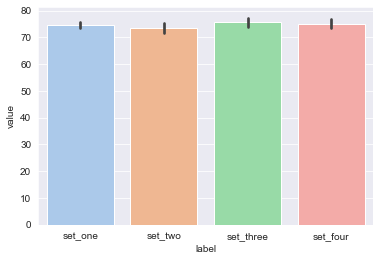

In [2]:
sns.barplot(
    x='label',
    y='value',
    data=df
)
plt.show()

***

## KDE Plots, Part I

Bar plots can tell us what the mean of our dataset is, but they do not give us any hints as to the distribution of the dataset values. For all we know, the data could be clustered around the mean or spread out evenly across the entire range.

To find out more about each of these datasets, we will need to examine their distributions. A common way of doing so is by plotting the data as a histogram, but histograms have their drawback as well.

Seaborn offers another option for graphing distributions: *KDE Plots*.

KDE stands for Kernel Density Estimator. A KDE plot gives us the sense of a *univariate* as a curve. A univariate dataset only has one variable and is also referred to as being *one-dimensional*, as opposed to *bivariate* or *two-dimensional* datasets which have two variables.

KDE plots are preferable to histograms because depending on how you group the data into bins and the width of the bins, you can draw wildly different conclusions about the shape of the data. Using a KDE plot can mitigate these issues, because they smooth the datasets, allow us to generalize over the shape of our data, and are not beholden to specific data points.

<img src="https://content.codecademy.com/programs/dataviz-python/unit-5/intro-to-seaborn/seaborn_distributions/kde-plot-white.svg" alt="Twitch Logo" style="background-color:#071c2e;"></img>

***

## KDE Plots, Part II

To plot a KDE in Seaborn, we use the method `sns.kdeplot()`.

A KDE plot takes the following arguments:

- `data` - the univariate dataset being visualized, like a Pandas DataFrame, Python list, or NumPy array
- `shade` - a boolean that determines whether or not the space underneath the curve is shaded

Let us examine the KDE plots of our three datasets:

```
sns.kdeplot(dataset1, shade=True)
sns.kdeplot(dataset2, shade=True)
sns.kdeplot(dataset3, shade=True)
plt.legend()
plt.show()
```

<img src="https://content.codecademy.com/programs/dataviz-python/unit-5/intro-to-seaborn/seaborn_distributions/kde-plot.png" alt="Twitch Logo" style="background-color:white;"></img>

Notice that when using a KDE we need to plot each of the original datasets separately, rather than using a combined dataframe like we did with the bar plot.

It looks like there are some big differences between the three datasets:

- Dataset 1 is skewed left
- Dataset 2 is normally distributed
- Dataset 3 is bimodal (it has two peaks)

So although all three datasets have roughly the same mean, the shapes of the KDE plots demonstrate the differences in how the values are distributed.

***
### Exercise

1. Use `sns.kdeplot()` to graph the four datasets and set shade to `True`.

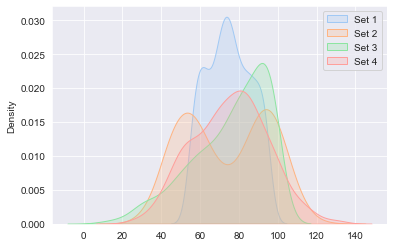

In [4]:
sns.kdeplot(set_one, shade=True)
sns.kdeplot(set_two, shade=True)
sns.kdeplot(set_three, shade=True)
sns.kdeplot(set_four, shade=True)
plt.legend(["Set 1", "Set 2", "Set 3", "Set 4"])
plt.show()

***

## Box Plots, Part I

While a KDE plot can tell us about the shape of the data, it is cumbersome to compare multiple KDE plots at once. They also cannot tell us other statistical information, like the values of outliers.

The box plot (also known as a box-and-whisker plot) cannot tell us about how our dataset is distributed, like a KDE plot. But it shows us the range of our dataset, gives us an idea about where a significant portion of our data lies, and whether or not any outliers are present.

Let us examine how we interpret a box plot:

- The **box** represents the interquartile range
- The **line in the middle** of the box is the median
- The **end lines** are the first and third quartiles
- The **diamonds** show outliers

<img src="https://content.codecademy.com/courses/updated_images/box-plot-white_Updated_1.svg" alt="Twitch Logo" style="background-color:#071c2e;"></img>

***

## Box Plots, Part II

One advantage of the box plot over the KDE plot is that in Seaborn, it is easy to plot multiples and compare distributions.

Let us look again at our three datasets, and how they look plotted as box plots:

```
sns.boxplot(data=df, x='label', y='value')
plt.show()
```

<img src="https://content.codecademy.com/programs/dataviz-python/unit-5/intro-to-seaborn/seaborn_distributions/box-plot.png" alt="Twitch Logo" style="background-color:white;"></img>

The box plot does a good job of showing certain differences, like those between Dataset 1 and Dataset 2; however, it does not show that Dataset 3 is bimodal.

To plot a box plot in Seaborn, we use the method `sns.boxplot()`.

A box plot takes the following arguments:

- `data` - the dataset we’re plotting, like a DataFrame, list, or an array
- `x` - a one-dimensional set of values, like a Series, list, or array
- `y` - a second set of one-dimensional data

If you use a Pandas Series for the `x` and `y` values, the Series will also generate the axis labels. For example, if you use the `value` Series as your `y` value data, Seaborn will automatically apply that name as the y-axis label.

***
### Exercise

1. Use `sns.boxplot()` to plot the four datasets as box plots.

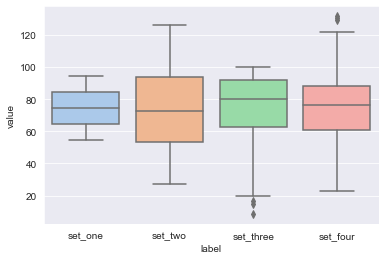

In [5]:
sns.boxplot(
    data=df,
    x='label',
    y='value'
)
plt.show()

***

## Violin Plots, Part I

As we saw in the previous exercises, while it is possible to plot multiple histograms, it is not a great option for comparing distributions. Seaborn gives us another option for comparing distributions - a violin plot. Violin plots provide more information than box plots because instead of mapping each individual data point, we get an estimation of the dataset thanks to the KDE.

Violin plots are less familiar and trickier to read, so let’s break down the different parts:

- There are two **KDE plots** that are symmetrical along the center line.
- A **white dot** represents the median.
- The **thick black line** in the center of each violin represents the interquartile range.
- The **lines that extend from the center** are the confidence intervals - just as we saw on the bar plots, a violin plot also displays the 95% confidence interval.

<img src="https://content.codecademy.com/programs/dataviz-python/unit-5/intro-to-seaborn/seaborn_distributions/violin-plot-white.svg" alt="Twitch Logo" style="background-color:#071c2e;"></img>

***

## Violin Plots, Part II

Violin Plots are a powerful graphing tool that allows you to compare multiple distributions at once.

Let us look at how our original three data sets look like as violin plots:

```
sns.violinplot(data=df, x="label", y="value")
plt.show()
```

As we can see, violin plots allow us to graph and compare multiple distributions. It also retains the shape of the distributions, so we can easily tell that Dataset 1 is skewed left and that Dataset 3 is bimodal.

To plot a violin plot in Seaborn, use the method `sns.violinplot()`.

There are several options for passing in relevant data to the `x` and `y` parameters:

- `data` - the dataset that we are plotting, such as a list, DataFrame, or array
- `x`, `y`, and `hue` - a one-dimensional set of data, such as a Series, list, or array
- any of the parameters to the function `sns.boxplot()`

***
### Exercise

1. Using `sns.violinplot()`, plot the four datasets as violin plots.

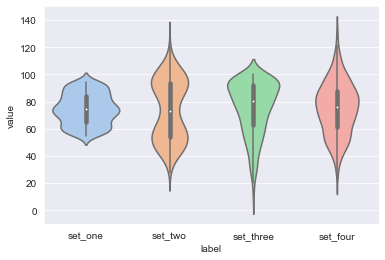

In [6]:
sns.violinplot(
    x='label',
    y='value',
    data=df
)
plt.show()

## Review

In this lesson, we examined how Seaborn has several plots that can visualize distributions. While bar plots can display basic aggregates, KDE plots, dist plots, box plots, and violin plots can show us distributions and other information.

- **KDE plot** - Kernel density estimator; shows a smoothed version of dataset. Use `sns.kdeplot()`.
- **Box plot** - A classic statistical model that shows the median, interquartile range, and outliers. Use `sns.boxplot()`.
- **Violin plot** - A combination of a KDE and a box plot. Good for showing multiple distributions at a time. Use `sns.violinplot()`.